Descrição e possíveis anotações

*Parâmetros para a modelagem*:

In [1]:
#Bibliotecas
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams["figure.figsize"] = (9,9)
L= 0.05 #Comprimento normal da mola (m)
M= 0.04 #Massa da mola (kg)
Ks= 0.0957 #Constante elástica da mola (N/m)
g= 9.81#Força gravitacional
Le= L+M*g/(2*Ks)
print("Comprimento esticado da mola: " + str(Le) + " m")

Comprimento esticado da mola: 2.1001567398119123 m


*PRIMEIRA ITERAÇÃO*

In [2]:
def modelo1 (lista, t):
    y1=lista[0]
    y2=lista[1]
    vy1=lista[2]
    vy2=lista[3]
    Fel= Ks*(y1-y2-L)
        
    if y1-y2 <= L:
        
        vy2 = vy1 # os dois se chocaram e como o y2 não vai ter resistencia pq ele ta suspenso a velocidade dos dois se tornará igual
        dy2dt= vy2
        dvy2dt= -g    
        dy1dt= vy1
        dvy1dt= -g #Por enquanto. Futuramente pode ser acrescentada a Resis.Do ar, por exemplo
        
    dy2dt= vy2
    dvy2dt= -g + (2*Fel)/M   
    dy1dt= vy1
    dvy1dt= -g - (2*Fel)/M
    
    if y2<=0:
        dy2dt= 0
        dvy2dt=0
        
    if y1 <=0:
        dy1dt= 0
        dvy1dt= 0
    
    dxdt=[dy1dt,dy2dt,dvy1dt,dvy2dt]
    return dxdt


In [3]:
#Definindo o tempo da modelagem (Em segundos):
dt=1e-3
lista_t=np.arange (0,0.6,dt)
#Definindo as condições iniciais
y1_0=Le+0.3
y2_0=0.3
vy1_0=0
vy2_0=0
iniciais= [y1_0,y2_0,vy1_0,vy2_0]

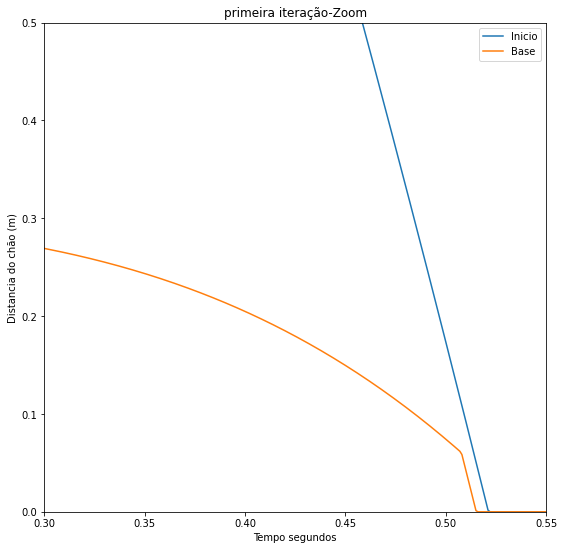

In [4]:
def PrimeiraIteração(Zoom):
    #Rodando a odeint:
    x= odeint(modelo1,iniciais, lista_t)
    lista_y1=x[:,0]
    lista_y2=x[:,1]
    lista_vy1=x[:,2]
    lista_vy2=x[:,3]
    plt.plot(lista_t,lista_y1, label="Inicio")
    plt.plot(lista_t,lista_y2, label= "Base")
    if Zoom == True:
        plt.title('primeira iteração-Zoom')
        plt.axis([0.3,0.55,0.0,0.5])
    else:
        plt.title('Primeira Iteração, com validação')
    plt.xlabel('Tempo segundos')
    plt.ylabel('Distancia do chão (m)')
PrimeiraIteração(True)
plt.legend()
plt.show()


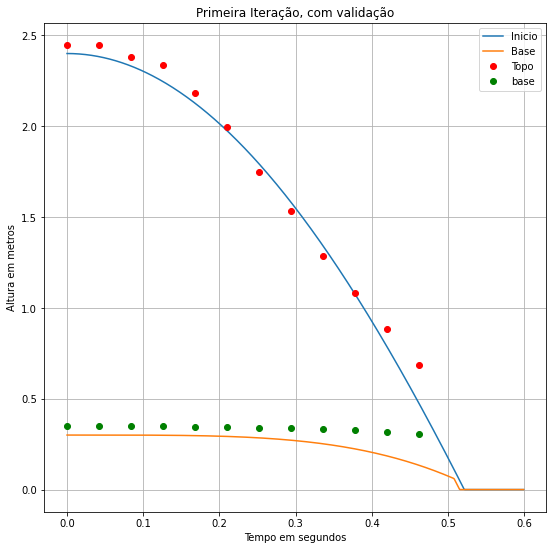

In [5]:
serie_temporal = []
posicao_y_topo = []
velocidade_y_topo = []
posicao_y_base = []
velocidade_y_base = []
text_file = open("Tracker_topo.txt", 'r')
lines = text_file.readlines()
text_file.close()
for line in lines:
    serie_temporal.append(float(line.split()[0])-1.387312398)
    posicao_y_topo.append(float(line.split()[1])*(-1))
    velocidade_y_topo.append(float(line.split()[2])*(-1))
text_file = open("Tracker_base.txt", 'r')
lines = text_file.readlines()
text_file.close()
for line in lines:
    posicao_y_base.append(float(line.split()[1])*(-1))
    velocidade_y_base.append(float(line.split()[2])*(-1))
PrimeiraIteração(False)
plt.plot(serie_temporal, posicao_y_topo, 'ro', label='Topo')
plt.plot(serie_temporal, posicao_y_base, 'go', label='base')
plt.xlabel("Tempo em segundos")
plt.ylabel("Altura em metros")
plt.grid(True)
plt.legend()
plt.show()

*2°ITERAÇÃO*

In [6]:
def modelo2 (lista, t):
    y1 =lista[0]
    y2 =lista[1]
    y3 =lista[2]
    vy1=lista[3]
    vy2=lista[4]
    vy3=lista[5]
    Fel_12= 2*Ks*(y1-y2-(L/2))
    Fel_23= 2*Ks*(y2-y3-(L/2))
    dy1dt= vy1
    dy2dt= vy2
    dy3dt= vy3
    dvy1dt= -g - (3*Fel_12)/M
    dvy2dt= -g + ((3*Fel_12)/M) - (3*Fel_23)/M 
    dvy3dt= -g + (3*Fel_23)/M 
    
    if y1 <= y2 + L/2 :
        
         # os dois se chocaram e como o y2 não vai ter resistencia pq ele ta suspenso a velocidade dos dois se tornará igual
        vy2 = vy1
        
        dvy1dt= -g    
        dy1dt= vy1
         #Por enquanto. Futuramente pode ser acrescentada a Resis.Do ar, por exemplo
        dy2dt= vy2
        dvy2dt= -g
         
    if y2 <= y3 + L/2 :
        vy3 = vy1
        dy3dt= vy3
        dvy3dt= -g
        
        
        
    if y2<=L/2:
        dy2dt= 0
        dvy2dt=0
        
    if y1 <=L:
        dy1dt= 0
        dvy1dt= 0
        
    if y3<=0:
        dy3dt= 0
        dvy3dt=0
        
    dxdt=[dy1dt,dy2dt,dy3dt, dvy1dt,dvy2dt, dvy3dt]
    return dxdt

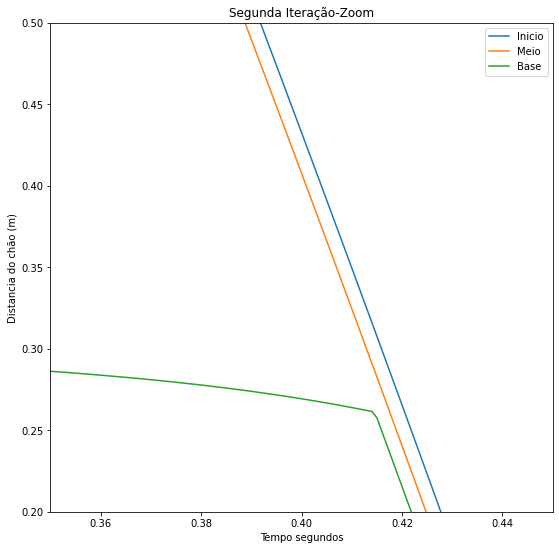

In [7]:
#Também será usado na validação
def SegundaIteração(Zoom):
    #Condições iniciais
    y1_0= 2.4
    y2_0= y1_0 - ((L/2) + M * g /(3 * Ks))
    y3_0= y1_0 - (L+M*g/(2*Ks))
    vy1_0=0
    vy2_0=0
    vy3_0=0
    iniciais= [y1_0,y2_0,y3_0,vy1_0,vy2_0, vy3_0]

    x= odeint(modelo2,iniciais, lista_t)
    lista_y1=x[:,0]
    lista_y2=x[:,1]
    lista_y3=x[:,2]
    lista_vy1=x[:,3]
    lista_vy2=x[:,4]
    lista_vy3=x[:,5]
    plt.plot(lista_t,lista_y1, label="Inicio")
    plt.plot(lista_t,lista_y2, label="Meio")
    plt.plot(lista_t,lista_y3, label= "Base")
    if Zoom == True:
        plt.title('Segunda Iteração-Zoom')
        plt.axis([0.35,0.45,0.2,0.5])
    else:
        plt.title('Segunda Iteração, com validação')
    plt.xlabel('Tempo segundos')
    plt.ylabel('Distancia do chão (m)')
SegundaIteração(True)
plt.legend()
plt.savefig('iteracao2zoom.png')
plt.show()

#print((L+M*g/(2*Ks)))
#print(lista_y3)

In [8]:
def modelo3 (lista, t, el):
    Ks = el
    y1 =lista[0]
    y2 =lista[1]
    y3 =lista[2]
    vy1=lista[3]
    vy2=lista[4]
    vy3=lista[5]
    Fel_12= 2*Ks*(y1-y2-(L/2))
    Fel_23= 2*Ks*(y2-y3-(L/2))
    dy1dt= vy1
    dy2dt= vy2
    dy3dt= vy3
    dvy1dt= -g - (3*Fel_12)/M
    dvy2dt= -g + ((3*Fel_12)/M) - (3*Fel_23)/M 
    dvy3dt= -g + (3*Fel_23)/M 
    
    if y1 <= y2 + L/2 :
        
         # os dois se chocaram e como o y2 não vai ter resistencia pq ele ta suspenso a velocidade dos dois se tornará igual
        vy2 = vy1
        
        dvy1dt= -g    
        dy1dt= vy1
         #Por enquanto. Futuramente pode ser acrescentada a Resis.Do ar, por exemplo
        dy2dt= vy2
        dvy2dt= -g
         
    if y2 <= y3 + L/2 :
        vy3 = vy1
        dy3dt= vy3
        dvy3dt= -g
        
        
        
    if y2<=L/2:
        dy2dt= 0
        dvy2dt=0
        
    if y1 <=L:
        dy1dt= 0
        dvy1dt= 0
        
    if y3<=0:
        dy3dt= 0
        dvy3dt=0
        
    dxdt=[dy1dt,dy2dt,dy3dt, dvy1dt,dvy2dt, dvy3dt]
    return dxdt

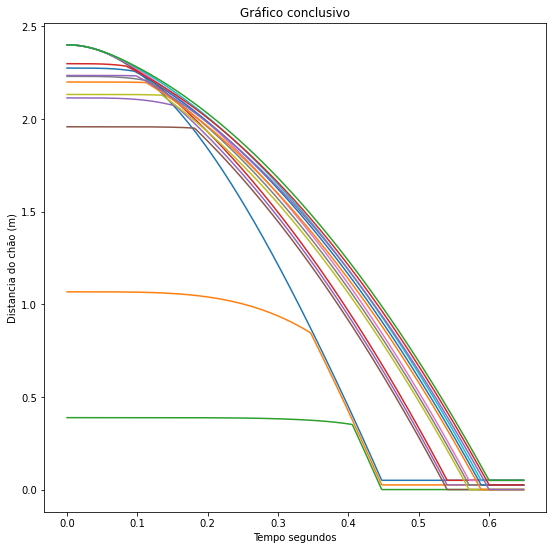

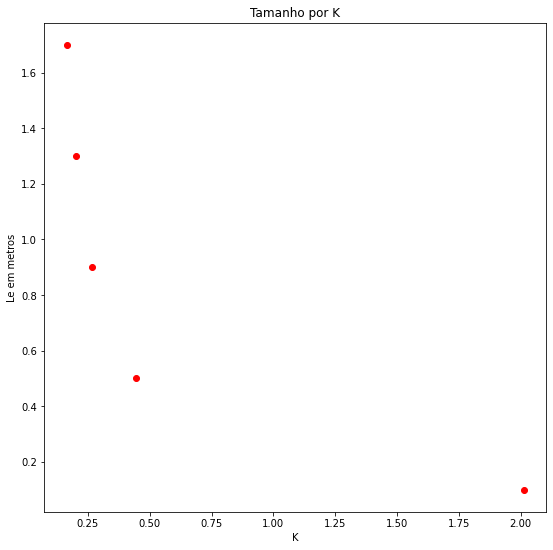

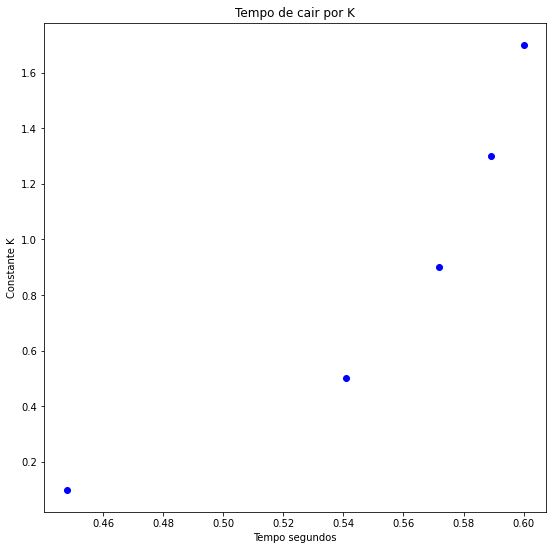

[2.012, 0.4424000000000001, 0.26800000000000024, 0.20092307692307676, 0.16541176470588237]
[0.448, 0.541, 0.5720000000000001, 0.589, 0.6]


In [9]:
elastics = np.arange(0.1,2 , 0.4)
tamanhos=[]

def encontrartempo(lista_t,lista_y3):
    tempo=0
    for i in range (0,len(lista_y3)):
        if lista_y3[i]<=0:
            tempo=lista_t[i]
            break
    return tempo

tempochao=[]
            
for el in elastics:
    lista_t=np.arange (0,0.65,dt)
    y1_0= 2.4
    y2_0= y1_0 - ((L/2) + M * g /(3 * el))
    y3_0= y1_0 - (L+M*g/(2*el))
    vy1_0=0
    vy2_0=0
    vy3_0=0
    iniciais= [y1_0,y2_0,y3_0,vy1_0,vy2_0, vy3_0]
    x= odeint(modelo3,iniciais, lista_t, args = (el,))
    lista_y1=x[:,0]
    lista_y2=x[:,1]
    lista_y3=x[:,2]
    lista_vy1=x[:,3]
    lista_vy2=x[:,4]
    lista_vy3=x[:,5]
    plt.plot(lista_t,lista_y1, label="Inicio{0}".format(el))
    plt.plot(lista_t,lista_y2, label="Meio{0}".format(el))
    plt.plot(lista_t,lista_y3, label= "Base{0}".format(el))
    #plt.axis([0.2,0.4,0.2,0.4])
    tamanhos.append(y1_0-y3_0)
    tempochao.append(encontrartempo(lista_t,lista_y3))
    
    
plt.title('Gráfico conclusivo')
plt.xlabel('Tempo segundos')
plt.ylabel('Distancia do chão (m)')
#plt.legend()
plt.savefig('iteracao3.png')
plt.show()

plt.plot(tamanhos, elastics,'ro')
plt.title('Tamanho por K')
plt.xlabel('K')
plt.ylabel('Le em metros')
#plt.legend()
plt.savefig('iteracao3.png')
plt.show()

plt.plot(tempochao, elastics,'bo')
plt.title('Tempo de cair por K')
plt.xlabel('Tempo segundos')
plt.ylabel('Constante K')
#plt.legend()
plt.savefig('iteracao3.png')
plt.show()
print(tamanhos)
print(tempochao)

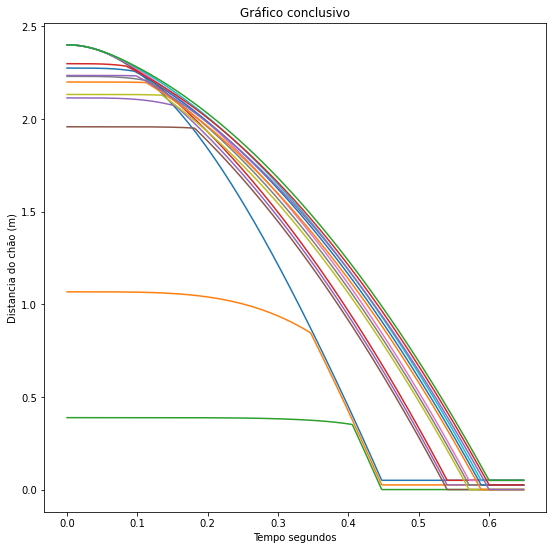

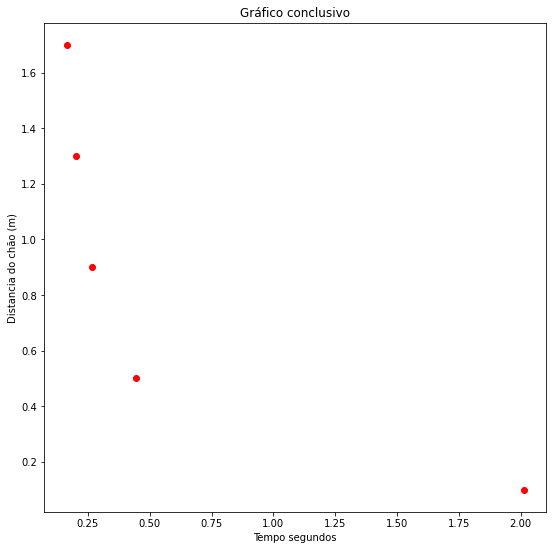

[2.012, 0.4424000000000001, 0.26800000000000024, 0.20092307692307676, 0.16541176470588237]
[0.448, 0.541, 0.5720000000000001, 0.589, 0.6]


In [10]:
elastics = np.arange(0.1, 2, 0.4)
tamanhos=[]

def encontrartempo(lista_t,lista_y3):
    tempo=0
    for i in range (0,len(lista_y3)):
        if lista_y3[i]<=0:
            tempo=lista_t[i]
            break
    return tempo

tempochao=[]
            
for el in elastics:
    lista_t=np.arange (0,0.65,dt)
    y1_0= 2.4
    y2_0= y1_0 - ((L/2) + M * g /(3 * el))
    y3_0= y1_0 - (L+M*g/(2*el))
    vy1_0=0
    vy2_0=0
    vy3_0=0
    iniciais= [y1_0,y2_0,y3_0,vy1_0,vy2_0, vy3_0]
    x= odeint(modelo3,iniciais, lista_t, args = (el,))
    lista_y1=x[:,0]
    lista_y2=x[:,1]
    lista_y3=x[:,2]
    lista_vy1=x[:,3]
    lista_vy2=x[:,4]
    lista_vy3=x[:,5]
    plt.plot(lista_t,lista_y1, label="Inicio{0}".format(el))
    plt.plot(lista_t,lista_y2, label="Meio{0}".format(el))
    plt.plot(lista_t,lista_y3, label= "Base{0}".format(el))
    #plt.axis([0.2,0.4,0.2,0.4])
    tamanhos.append(y1_0-y3_0)
    tempochao.append(encontrartempo(lista_t,lista_y3))
    
    
plt.title('Gráfico conclusivo')
plt.xlabel('Tempo segundos')
plt.ylabel('Distancia do chão (m)')
#plt.legend()
plt.savefig('iteracao3.png')
plt.show()

plt.plot(tamanhos, elastics,'ro')
plt.title('Gráfico conclusivo')
plt.xlabel('Tempo segundos')
plt.ylabel('Distancia do chão (m)')
#plt.legend()
plt.savefig('iteracao3.png')
plt.show()

print(tamanhos)
print(tempochao)

In [ ]:
#Animação
